In [1]:
%load_ext autoreload
%autoreload 2

import os
import random

import numpy as np
import torch
import matplotlib.pyplot as plt
opj = os.path.join
import pickle as pkl
import argparse
import torchvision
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# adaptive-wavelets modules
from awd.awd.utils import get_wavefun
from awd.awd.transform2d import DWT2d
from awd.models.models import CNN, FFN

# params
wave = 'db5'
mode = 'zero'
J = 4

ModuleNotFoundError: No module named 'awd'

# initialize model

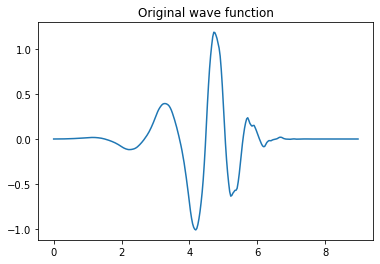

In [22]:
# initialize model
wt = DWT2d(wave=wave, mode=mode, J=J).to(device)

# visualize
phi_orig, psi_orig, x_orig = get_wavefun(wt)
plt.plot(x_orig, psi_orig)
plt.title('Original wave function')
plt.show()

# load mnist data
For larger data, can use a dataloader rather than just an array

In [23]:
transformer = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])
train_dataset = torchvision.datasets.MNIST(root="../data/mnist",
                                           transform=transformer)
X = train_dataset.data[:200]
X.shape

torch.Size([200, 28, 28])

# fit adaptive wavelet to the data

In [10]:
wt.fit(X=X, lr=1e-1, num_epochs=10) # this function alternatively accepts a dataloader

Starting Training Loop...
Train Epoch: 0 [0/1000 (0%)]	Loss: 597792.812500+0.000001j
====> Epoch: 0 Average train loss: 597792.8125+0.0000j
Train Epoch: 1 [0/1000 (0%)]	Loss: 4159486.500000+0.000001j
====> Epoch: 1 Average train loss: 4159486.5000+0.0000j
Train Epoch: 2 [0/1000 (0%)]	Loss: 3944082.500000+0.000002j
====> Epoch: 2 Average train loss: 3944082.5000+0.0000j
Train Epoch: 3 [0/1000 (0%)]	Loss: 3344594.250000+0.000001j
====> Epoch: 3 Average train loss: 3344594.2500+0.0000j
Train Epoch: 4 [0/1000 (0%)]	Loss: 2899808.000000+0.000001j
====> Epoch: 4 Average train loss: 2899808.0000+0.0000j
Train Epoch: 5 [0/1000 (0%)]	Loss: 2663244.000000+0.000001j
====> Epoch: 5 Average train loss: 2663244.0000+0.0000j
Train Epoch: 6 [0/1000 (0%)]	Loss: 2284314.500000+0.000001j
====> Epoch: 6 Average train loss: 2284314.5000+0.0000j
Train Epoch: 7 [0/1000 (0%)]	Loss: 1277003.375000+0.000001j
====> Epoch: 7 Average train loss: 1277003.3750+0.0000j
Train Epoch: 8 [0/1000 (0%)]	Loss: 2189837.00000

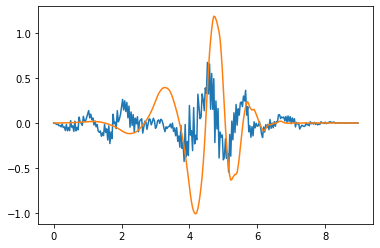

In [11]:
phi, psi, x = get_wavefun(wt)
plt.plot(x, psi)
plt.plot(x_orig, psi_orig)

# add in pre-trained mnist model

In [24]:
# load a pre-trained CNN on MNIST (which acheives 99% acc)
cnn = CNN().to(device)
cnn.load_state_dict(torch.load('../data/mnist/CNN.pth'))
cnn.eval()

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [33]:
wt = DWT2d(wave=wave, mode=mode, J=J).to(device)
wt.fit(X=X, pretrained_model=cnn, lr=1e-1, num_epochs=30,
       lamL1attr=5) # this function alternatively accepts a dataloader

Starting Training Loop...
Train Epoch: 0 [0/200 (0%)]	Loss: 5568.318359+0.000001j
====> Epoch: 0 Average train loss: 5568.3184+0.0000j
Train Epoch: 1 [0/200 (0%)]	Loss: 4036649.250000+0.000002j
====> Epoch: 1 Average train loss: 4036649.2500+0.0000j
Train Epoch: 2 [0/200 (0%)]	Loss: 22245920.000000+0.000001j
====> Epoch: 2 Average train loss: 22245920.0000+0.0000j
Train Epoch: 3 [0/200 (0%)]	Loss: 3076850.750000+0.000001j
====> Epoch: 3 Average train loss: 3076850.7500+0.0000j
Train Epoch: 4 [0/200 (0%)]	Loss: 3898468.500000+0.000002j
====> Epoch: 4 Average train loss: 3898468.5000+0.0000j
Train Epoch: 5 [0/200 (0%)]	Loss: 4019536.000000+0.000002j
====> Epoch: 5 Average train loss: 4019536.0000+0.0000j
Train Epoch: 6 [0/200 (0%)]	Loss: 3873358.000000+0.000002j
====> Epoch: 6 Average train loss: 3873358.0000+0.0000j
Train Epoch: 7 [0/200 (0%)]	Loss: 3483141.750000+0.000001j
====> Epoch: 7 Average train loss: 3483141.7500+0.0000j
Train Epoch: 8 [0/200 (0%)]	Loss: 2711307.500000+0.000001j

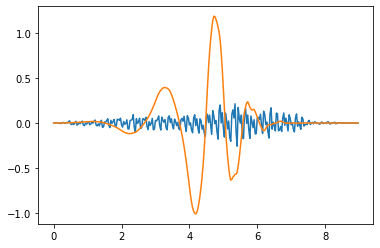

In [34]:
phi, psi, x = get_wavefun(wt)
plt.plot(x, psi)
plt.plot(x_orig, psi_orig)